In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
import numpy as np; import sys; import os; from time import time


In [17]:
(AX, AY), (QX, QY) = fashion_mnist.load_data() # AX [60000,28,28] AY [60000,]
AX=255-AX; QX=255-QX



nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses) # 3 -> 0001000000
QY2 = keras.utils.to_categorical(QY, nclasses)

nl, nc = AX.shape[1], AX.shape[2] #28, 28
AX = (AX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
QX = (QX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
AX = np.expand_dims(AX,axis=3) # AX [60000,28,28,1]
QX = np.expand_dims(QX,axis=3)

nl, nc = AX.shape[1], AX.shape[2] #28, 28

model = Sequential() # 28x28
model.add(Conv2D(30, kernel_size=(3,3), activation='relu', input_shape=(nl, nc, 1) )) #20x24x24
model.add(MaxPooling2D(pool_size=(2,2))) #20x12x12
model.add(Conv2D(60, kernel_size=(3,3), activation='relu')) #40x8x8
model.add(MaxPooling2D(pool_size=(2,2))) #40x4x4
model.add(Flatten()) #640
model.add(Dense(200, activation='relu')) #200
model.add(Dense(10, activation='softmax')) #10

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True);
model.summary()


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 60)        16260     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 60)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)    

In [19]:
opt=optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
t0=time()
model.fit(AX, AY2, batch_size=100, epochs=30, verbose=2)
t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))


Epoch 1/30
600/600 - 25s - loss: 0.5026 - accuracy: 0.8212 - 25s/epoch - 41ms/step
Epoch 2/30
600/600 - 24s - loss: 0.3284 - accuracy: 0.8825 - 24s/epoch - 40ms/step
Epoch 3/30
600/600 - 24s - loss: 0.2822 - accuracy: 0.8971 - 24s/epoch - 41ms/step
Epoch 4/30
600/600 - 25s - loss: 0.2490 - accuracy: 0.9089 - 25s/epoch - 41ms/step
Epoch 5/30
600/600 - 26s - loss: 0.2242 - accuracy: 0.9167 - 26s/epoch - 43ms/step
Epoch 6/30
600/600 - 25s - loss: 0.2032 - accuracy: 0.9246 - 25s/epoch - 41ms/step
Epoch 7/30
600/600 - 25s - loss: 0.1854 - accuracy: 0.9312 - 25s/epoch - 41ms/step
Epoch 8/30
600/600 - 25s - loss: 0.1647 - accuracy: 0.9394 - 25s/epoch - 42ms/step
Epoch 9/30
600/600 - 25s - loss: 0.1493 - accuracy: 0.9449 - 25s/epoch - 42ms/step
Epoch 10/30
600/600 - 27s - loss: 0.1373 - accuracy: 0.9478 - 27s/epoch - 45ms/step
Epoch 11/30


KeyboardInterrupt: 

In [5]:
score = model.evaluate(QX, QY2, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))
t2=time()
QP2=model.predict(QX); QP=np.argmax(QP2,1)
t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))
nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))

Test loss: 0.5452
Test accuracy: 90.82 %
Test error: 9.18 %
Tempo de predicao: 2.24 s
nerro=918


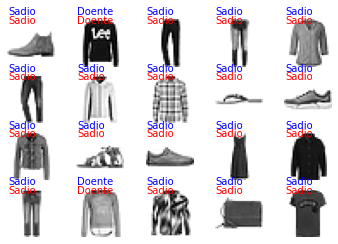

In [6]:
from matplotlib import pyplot as plt
categorias=["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Botins"]
f = plt.figure()
for i in range(20):
    f.add_subplot(4,5,i+1)
    plt.imshow( QX[i,:,:,0], cmap="gray", vmin=-0.5, vmax=+0.5)
    plt.axis("off");
    if (categorias[QP[i]] == "Pulôver"):
        plt.text(0, 2,"Doente",color="r")
    else:
        plt.text(0, 2,"Sadio",color="r")
    if (categorias[QY[i]] == "Pulôver"):
        plt.text(0, -3,"Doente",color="b")
    else:
        plt.text(0, -3,"Sadio",color="b")
plt.savefig("nomefigura.png")
plt.show()
